<a href="https://colab.research.google.com/github/ChameliMasha/image_processing_assignment/blob/main/image_processing_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Enter the intensity levels (should be a power of 2): 2


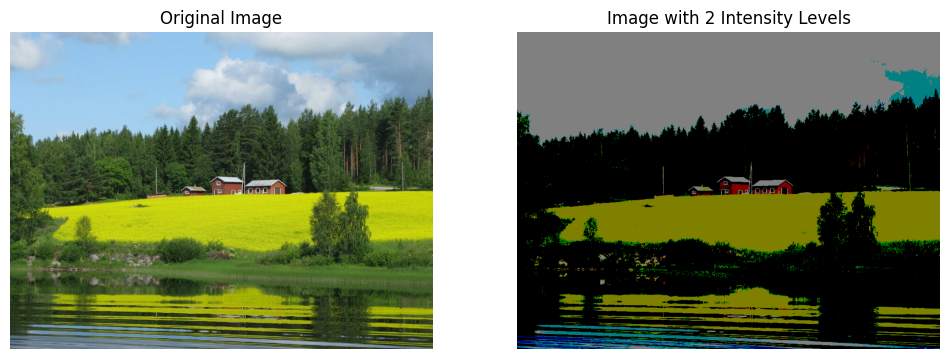

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def reduce_intensity_levels(imageArray, numLevels):
    factor = 256 // numLevels
    reduced_image = (imageArray // factor) * factor
    return reduced_image

imagePath = "nature.jpg"
image = Image.open(imagePath)
imageArray = np.array(image)

numLevels = int(input("Enter the intensity levels (should be a power of 2): "))

if numLevels & (numLevels - 1) != 0:
    print("The is invalid.")
else:
    reduced_image = reduce_intensity_levels(imageArray, numLevels)

    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    axes[0].imshow(imageArray, cmap='gray')
    axes[0].set_title('Original Image')
    axes[0].axis('off')
    axes[1].imshow(reduced_image, cmap='gray')
    axes[1].set_title(f'Image with {numLevels} Intensity Levels')
    axes[1].axis('off')
    plt.show()

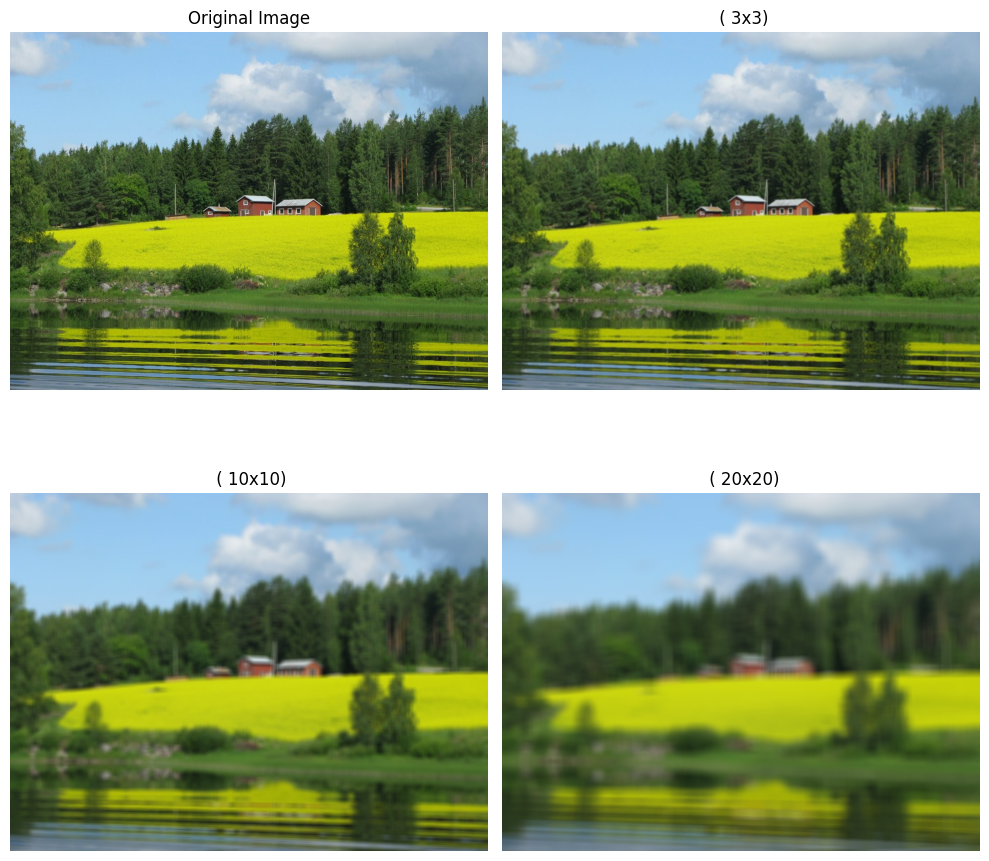

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def averageFilter(image, kernelSize):
    return cv2.blur(image, (kernelSize, kernelSize))

imagePath = "nature.jpg"
image = cv2.imread(imagePath)

if image is None:
    print("Error: Unable to load image.")
else:
    #display
    fig, axes = plt.subplots(2, 2, figsize=(10, 10))

    axes[0, 0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    axes[0, 0].set_title('Original Image')
    axes[0, 0].axis('off')

    for i, kernelSize in enumerate([3, 10, 20]):
        row = (i + 1) // 2
        col = (i + 1) % 2
        filteredImage = averageFilter(image, kernelSize)
        axes[row, col].imshow(cv2.cvtColor(filteredImage, cv2.COLOR_BGR2RGB))
        axes[row, col].set_title(f' ( {kernelSize}x{kernelSize})')
        axes[row, col].axis('off')

    plt.tight_layout()
    plt.show()

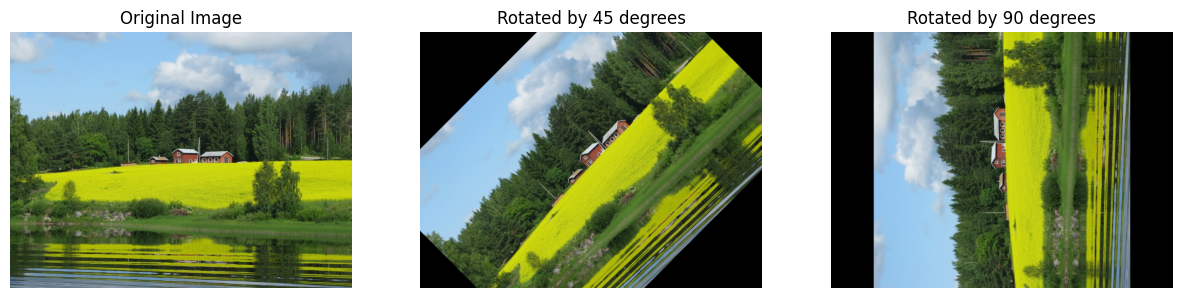

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


imagePath = "nature.jpg"
image = cv2.imread(imagePath)

if image is None:
    print("Error: Unable to load image.")
else:
    # Rotate by 45 degrees
    rows, cols = image.shape[:2]
    M45 = cv2.getRotationMatrix2D((cols / 2, rows / 2), 45, 1)
    rotated_45 = cv2.warpAffine(image, M45, (cols, rows))

    # Rotate by 90 degrees
    M90 = cv2.getRotationMatrix2D((cols / 2, rows / 2), 90, 1)
    rotated_90 = cv2.warpAffine(image, M90, (cols, rows))

    # Display results
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    axes[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    axes[0].set_title('Original Image')
    axes[0].axis('off')

    axes[1].imshow(cv2.cvtColor(rotated_45, cv2.COLOR_BGR2RGB))
    axes[1].set_title('Rotated by 45 degrees')
    axes[1].axis('off')

    axes[2].imshow(cv2.cvtColor(rotated_90, cv2.COLOR_BGR2RGB))
    axes[2].set_title('Rotated by 90 degrees')
    axes[2].axis('off')

    plt.show()

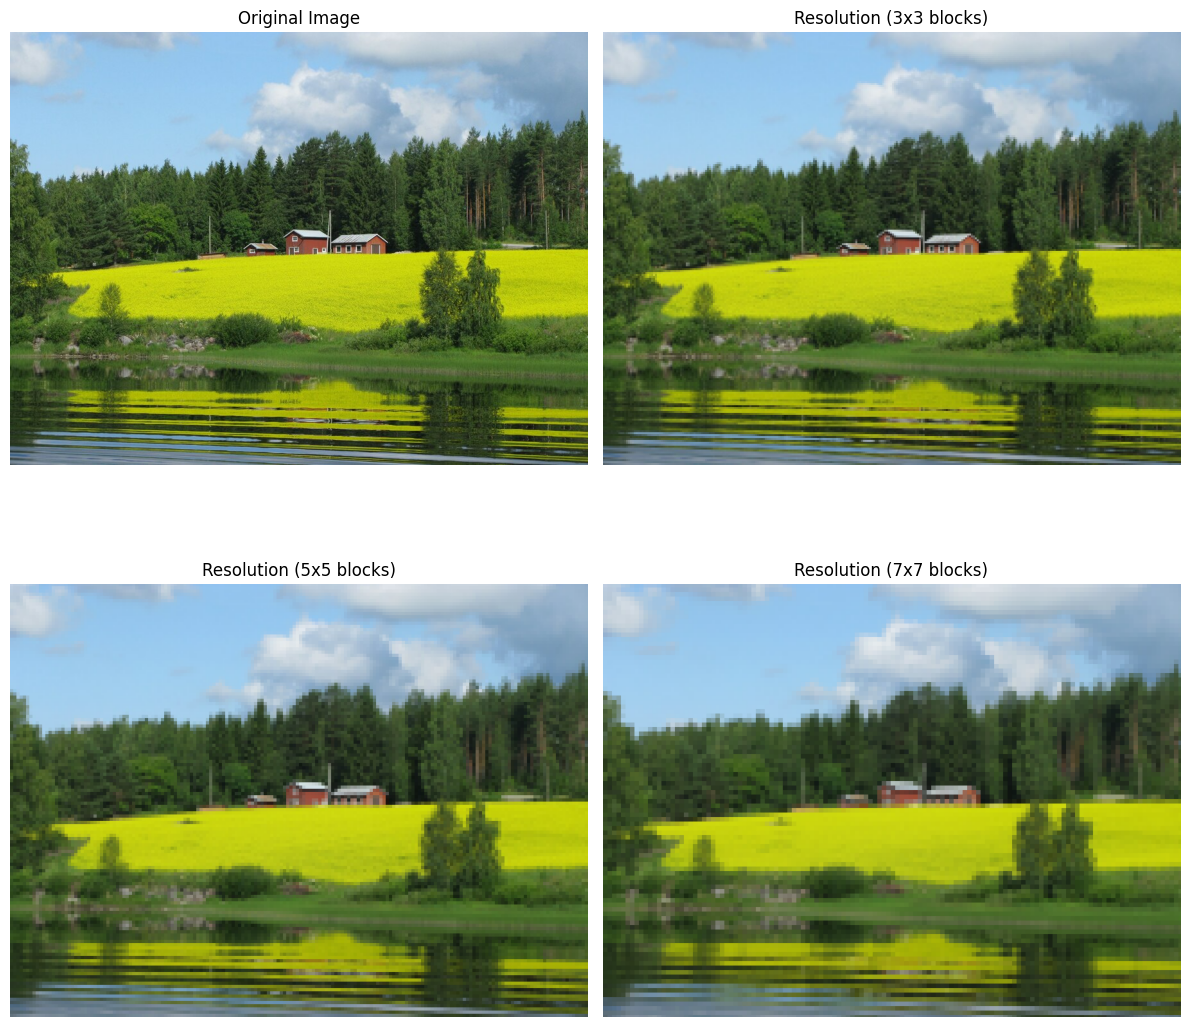

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#function for reduce resolution
def reduceResolution(image, block_size):
    reducedImage = np.zeros_like(image)
    rows, cols = image.shape[:2]
    for i in range(0, rows, block_size):
        for j in range(0, cols, block_size):
            block = image[i:i+block_size, j:j+block_size]
            average_color = np.mean(block, axis=(0, 1))
            reducedImage[i:i+block_size, j:j+block_size] = average_color
    return reducedImage

image_path = "nature.jpg"
image = cv2.imread(image_path)

if image is None:
    print("Error: Unable to load image.")
else:
    reducedImage_3x3 = reduceResolution(image, 3)
    reducedImage_5x5 = reduceResolution(image, 5)
    reducedImage_7x7 = reduceResolution(image, 7)

    # Display
    fig, axes = plt.subplots(2, 2, figsize=(12, 12))

    axes[0, 0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    axes[0, 0].set_title('Original Image')
    axes[0, 0].axis('off')

    axes[0, 1].imshow(cv2.cvtColor(reducedImage_3x3, cv2.COLOR_BGR2RGB))
    axes[0, 1].set_title('Resolution (3x3 blocks)')
    axes[0, 1].axis('off')

    axes[1, 0].imshow(cv2.cvtColor(reducedImage_5x5, cv2.COLOR_BGR2RGB))
    axes[1, 0].set_title('Resolution (5x5 blocks)')
    axes[1, 0].axis('off')

    axes[1, 1].imshow(cv2.cvtColor(reducedImage_7x7, cv2.COLOR_BGR2RGB))
    axes[1, 1].set_title('Resolution (7x7 blocks)')
    axes[1, 1].axis('off')

    plt.tight_layout()
    plt.show()
